Spectrogram Demo of a noisy sine wave from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/specgram_demo.html#sphx-glr-gallery-images-contours-and-fields-specgram-demo-py


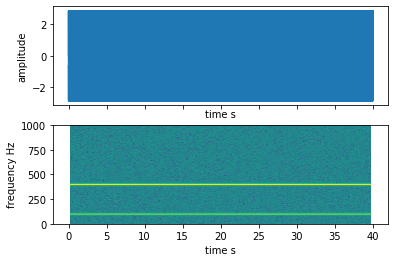

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
%matplotlib inline

# Fixing random state for reproducibility
np.random.seed(19680801)

#dt space between time samples
dt = 0.0005

#t array of times from 0 to 20 with spacing 0.0005
t = np.arange(0.0, 40.0, dt)

#s1 signal 1 with freq 100Hz - amplitude 1
s1 = np.sin(2 * np.pi * 100 * t)

#signal 2 freq 400Hz - amp 2
s2 = 2 * np.sin(2 * np.pi * 400 * t)



# create a transient "chirp"
#values of signal 2 which are less than/equal to 10 and those which are larger/equal to 12 are set to 0
#s2[t <= 10] = s2[12 <= t] = 0

# add some noise into the mix
nse = 0.01 * np.random.random(size=len(t))

x = s1 + s2 + nse  # the signal
NFFT = 1024  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.plot(t, x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot



ax1.set_xlabel("time s")
ax1.set_ylabel("amplitude")
ax2.set_xlabel("time s")
ax2.set_ylabel("frequency Hz")
plt.show()

Examples of GW signal shapes from paper https://arxiv.org/pdf/1202.2788.pdf   

Sino-gaussian - Need to move pulse to middle of the time series so that noise can also be added (in a seperate plot)

Text(0, 0.5, 'frequency Hz')

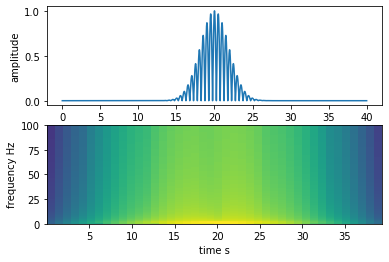

In [89]:
detect_sig = np.zeros(len(t))

#make time series for gauss pulse
gauss_t = np.arange(-20, 20, dt)

fig, (axg1, axg2) = plt.subplots(nrows=2)
gauss_sig = signal.gausspulse(gauss_t, fc=1, bw=0.20)
detect_sig = np.abs(np.copy(gauss_sig))

#gauss_sig = gauss_sig + nse
axg1.plot(t,detect_sig)

gauss_sin = axg2.specgram(gauss_sig,NFFT=2000, Fs=Fs)
axg2.set_ylim([0,100])


axg1.set_xlabel("time s")
axg1.set_ylabel("amplitude")
axg2.set_xlabel("time s")
axg2.set_ylabel("frequency Hz")

Ringdown waveform - damped sinusoid


Text(0, 0.5, 'frequency Hz')

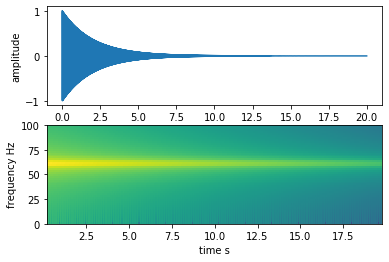

In [4]:
#exp[-1*damp*t] * cos[2pi*t*freq]

#use t from earlier

#chose damp - the damping constant
damp = 0.5

#frequency of sinusoid
ring_freq = 60

#calculate sige
ring_sig = np.exp(-1*damp*t)*np.cos(2*np.pi*t*ring_freq)


#plot 
fig, (axR1, axR2) = plt.subplots(nrows=2)
axR1.plot(t,ring_sig)
#spectrogram
ringdown = axR2.specgram(ring_sig,NFFT=NFFT, Fs=Fs, noverlap=900)
axR2.set_ylim([0,100])



axR1.set_xlabel("time s")
axR1.set_ylabel("amplitude")
axR2.set_xlabel("time s")
axR2.set_ylabel("frequency Hz")

Gaussian waveform
